<a href="https://colab.research.google.com/github/hammadmustafa-alt/Deep-Learning/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/compresive_strength_concrete.csv")

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.shape

(1030, 9)

In [ ]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
data = data.rename(columns= {'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash',
       'Water  (component 4)(kg in a m^3 mixture)': 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplastic',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarseagg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fineagg', 'Age (day)': 'age',
       'Concrete compressive strength(MPa, megapascals) ': 'strength'})

In [ ]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [ ]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [ ]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [ ]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
network = M.Sequential()
network.add(L.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
network.add(L.Dense(64,activation="relu"))
network.add(L.Dense(32,activation="relu"))
network.add(L.Dense(1))
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])
history = network.fit(X_train,Y_train,epochs=100,validation_split=0.3, batch_size = 16)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 1392.6496 - mae: 33.6477 - val_loss: 657.3172 - val_mae: 20.6077
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 537.6999 - mae: 18.1685 - val_loss: 231.1709 - val_mae: 12.1946
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 233.7482 - mae: 12.3024 - val_loss: 217.0273 - val_mae: 11.9982
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 207.5420 - mae: 11.6416 - val_loss: 179.4196 - val_mae: 10.9832
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 193.3171 - mae: 11.2969 - val_loss: 174.2244 - val_mae: 10.8184
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 163.6258 - mae: 10.4667 - val_loss: 162.1799 - val_mae: 10.5016
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 167.6628 - mae: 10.7190 - val_loss: 155.1467 - val_mae: 10.2870
Epoch 8/100
32/32 [=====================

In [ ]:
loss, mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 36.7462 - mae: 4.3174


In [ ]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

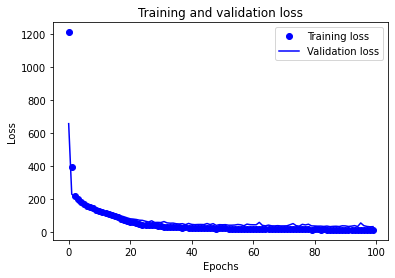

In [ ]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

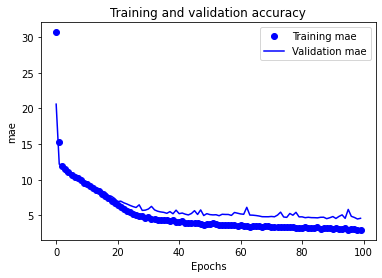

In [ ]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [ ]:
y_pred = network.predict(X_test)

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_pred

array([47.969097 , 53.00696  , 30.920288 , 35.95427  , 31.425423 ,
       43.210663 , 48.95754  , 48.713837 , 48.24845  , 15.318436 ,
       47.592747 , 48.06531  , 53.571396 , 46.080738 , 46.25685  ,
       45.562508 , 31.217588 , 31.562824 , 78.48166  , 38.991413 ,
       49.971657 , 37.650703 , 33.521782 , 32.63942  , 33.521782 ,
       31.061407 , 43.45758  , 53.408203 , 38.62585  , 35.918682 ,
       38.625847 , 38.625847 , 47.628773 , 43.625145 , 56.689648 ,
       65.45058  , 61.59171  , 63.856415 , 65.01136  , 65.45058  ,
       72.93652  , 72.823784 , 60.281845 , 59.31954  , 60.281845 ,
       60.281845 , 75.108246 , 83.82706  , 71.11148  , 74.100975 ,
       88.40074  , 75.09833  , 28.04022  , 34.116325 , 38.515778 ,
       10.418779 , 38.808086 , 41.631836 , 27.832954 , 36.000397 ,
       41.29601  , 40.078434 , 19.743906 , 46.488403 , 17.126831 ,
       31.043932 ,  8.555604 , 15.43677  , 48.19459  ,  7.6886673,
       37.70433  , 33.260075 , 42.713196 , 25.614553 , 42.2857

In [ ]:
Y_test

array([40.27, 41.05, 45.85, 38.07, 47.81, 39.36, 56.14, 36.25, 41.54,
       15.05, 40.76, 46.93, 41.93, 50.95, 54.38, 55.06, 30.28, 40.86,
       71.99, 36.3 , 40.2 , 33.4 , 35.3 , 24.4 , 35.3 , 24.1 , 46.8 ,
       54.9 , 55.9 , 47.1 , 55.9 , 55.9 , 56.1 , 59.09, 60.29, 71.3 ,
       74.7 , 66.  , 74.5 , 71.3 , 63.4 , 64.9 , 64.3 , 60.2 , 64.3 ,
       64.3 , 77.3 , 54.9 , 71.7 , 70.7 , 56.5 , 73.3 , 24.89, 29.45,
       34.56, 12.45, 33.96, 37.34, 24.9 , 34.2 , 39.61, 35.34, 22.72,
       40.39, 25.48, 28.63,  7.75, 17.82, 49.97, 19.93, 39.59, 29.22,
       42.35, 26.31, 42.55, 13.33, 44.4 , 31.35, 33.73, 32.66, 21.5 ,
       48.67, 31.12, 34.74, 23.14, 41.89, 48.72, 33.36, 15.36, 30.85,
       42.03, 51.06, 21.78, 42.29, 56.85, 21.91, 36.99, 47.4 , 51.96,
       30.45, 47.71, 66.82, 66.95, 27.42, 35.96, 18.02, 38.6 , 30.22,
       36.3 , 57.23, 78.8 , 60.28, 39.38, 44.33, 52.3 , 58.52, 69.84,
       19.42, 14.94, 21.29, 23.08, 15.52, 11.98, 16.88, 33.09, 31.81,
       33.01, 24.66,

(0.0, 100.0)

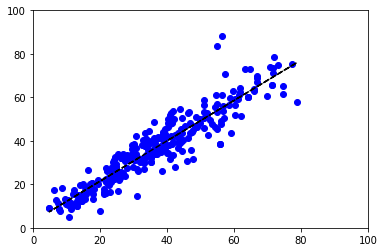

In [ ]:
coef = np.polyfit(Y_test,y_pred,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(Y_test,y_pred, 'bo', Y_test, poly1d_fn(Y_test), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)